In [1]:
%matplotlib inline

import numpy as np
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Table 1

In [2]:
kz_temp_series = pd.read_pickle('kz_temp_series.pkl')

In [3]:
kz_station_info = pd.read_pickle('kz_station_info.pkl')

In [4]:
pd.set_option('display.max_rows',6)

In [5]:
mean_jan = kz_temp_series.loc['1960-1':'2009-1':12].mean(axis=0)
mean_jan.name = 'MEAN_JAN'
mean_jul = kz_temp_series.loc['1960-7':'2009-7':12].mean(axis=0)
mean_jul.name = 'MEAN_JUL'

In [6]:
kz_table1_basic_info = kz_station_info.set_index('STATION_NAME').join(mean_jan).join(mean_jul)

In [7]:
kz_table1_basic_info.rename(index=str.title, columns=str.title, inplace=True)

In [8]:
kz_table1_basic_info

,Elevation,Latitude,Longitude,Mean_Jan,Mean_Jul
STATION_NAME,,,,,
Aktobe,219,50.2831,57.1500,-13.394,22.618
Aralskoe More,62,46.7794,61.6694,-11.444,26.864
Uralsk,36,51.2500,51.4000,-11.552,22.628
...,...,...,...,...,...
Petropavlovsk,142,54.8331,69.1500,-16.724,19.550
Zharkent,645,44.1667,80.0667,-6.898,24.426
Uil,128,49.0667,54.6831,-11.498,24.780


In [9]:
# kz_table1_basic_info.to_excel('kz_table1_basic_info.xlsx')

### Figure 1, location of stations

In [10]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature


import cartopy.io.shapereader as shpreader

shpfilename = shpreader.natural_earth(resolution='50m',
                                      category='cultural',
                                      name='admin_0_countries')

reader = shpreader.Reader(shpfilename)

In [11]:
import itertools

def extract_geometries(reader, select_dict):
    records = reader.records()
    
    key = select_dict.keys()[0]
    value = select_dict[key]
    
    filter_geo = lambda x: x.attributes[key]==value
    return [item.geometry for item in itertools.ifilter(filter_geo,records)]

/home/ek777/anaconda/lib/python2.7/site-packages/cartopy/mpl/geoaxes.py:533: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f513eff1ad0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


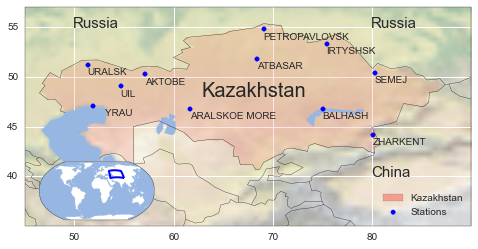

In [54]:
plt.figure(figsize=(8,6))

ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.stock_img()
extent = [45,90,35,55]
ax.set_extent(extent)
ax.set_xticks([50,60,70,80])
ax.set_yticks([40,45,50,55])

select_dict = {'name':'Kazakhstan'}

ax.add_geometries(extract_geometries(reader,select_dict),ccrs.PlateCarree(),\
                 facecolor='red',edgecolor='black',alpha=0.1,linewidth=0)

ax.add_feature(cfeature.LAKES,zorder=1)
ax.add_feature(cfeature.BORDERS,zorder=2)
ax.add_feature(cfeature.OCEAN,zorder=3)

lat_KZ = np.array(kz_station_info['LATITUDE'])
lon_KZ = np.array(kz_station_info['LONGITUDE'])
station_plot = ax.scatter(lon_KZ,lat_KZ, color='b',transform=ccrs.Geodetic(),label='Stations',zorder=5)


ax.text(50, 55, 'Russia', transform=ccrs.Geodetic(),size=15)
ax.text(80, 55, 'Russia', transform=ccrs.Geodetic(),size=15)
ax.text(80, 40, 'China', transform=ccrs.Geodetic(),size=15)
ax.text(63, 48, 'Kazakhstan', transform=ccrs.Geodetic(),size=20)


import matplotlib.patches as mpatches

# make two proxy artists to add to a legend
kz_legend_proxy = mpatches.Rectangle((0, 0), 1, 1, facecolor="red",alpha=0.3)
labels = ['Kazakhstan','Stations']

plt.legend([kz_legend_proxy,station_plot], labels,\
            loc='lower right')

sub_ax = plt.axes([0.15, 0.24, 0.2, 0.2], projection=ccrs.Robinson())
sub_ax.add_feature(cfeature.OCEAN, zorder=0)

import shapely.geometry as sgeom
extent_box = sgeom.box(extent[0], extent[2], extent[1], extent[3])
sub_ax.add_geometries([extent_box], ccrs.Geodetic(), color='none',
                          edgecolor='blue', linewidth=2)

for index, row in kz_station_info.iterrows():
    ax.text(row.LONGITUDE, row.LATITUDE-1,row.STATION_NAME, transform=ccrs.Geodetic())

# plt.savefig('KZ_fig_1_location.png',dpi=600)

<matplotlib.colorbar.Colorbar instance at 0x7f513f1d1830>

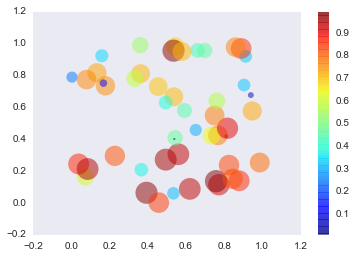

In [35]:
import matplotlib.pyplot as plt
import numpy

n = 50
x = numpy.random.rand(n)
y = numpy.random.rand(n)
z = numpy.random.rand(n)
cm = plt.cm.get_cmap('jet')

fig, ax = plt.subplots()
sc = ax.scatter(x,y,s=z*500,c=z,cmap=cm,linewidth=0,alpha=0.5)
ax.grid()
fig.colorbar(sc)

In [40]:
z.size

50

<matplotlib.colorbar.Colorbar instance at 0x7f513e5ab9e0>

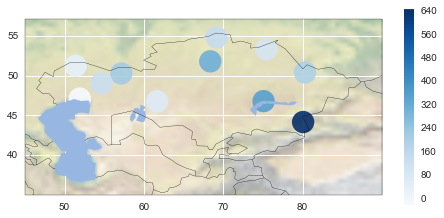

In [50]:
fig = plt.figure(figsize=(8,3.5))

ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.stock_img()
extent = [45,90,35,55]
ax.set_extent(extent)
ax.set_xticks([50,60,70,80])
ax.set_yticks([40,45,50,55])

ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)

lat_KZ = np.array(kz_station_info['LATITUDE'])
lon_KZ = np.array(kz_station_info['LONGITUDE'])

elev_KZ = np.array(kz_station_info['ELEVATION'])

cm = plt.cm.get_cmap('Blues')

station_plot = ax.scatter(lon_KZ,lat_KZ, s=500, c=kz_station_info['ELEVATION'], cmap=cm, transform=ccrs.Geodetic(),linewidth=0,alpha=0.9, label='Stations')

fig.colorbar(station_plot)

# plt.savefig('KZ_fig_1_location.png',dpi=600)

### Figure 2, illustration

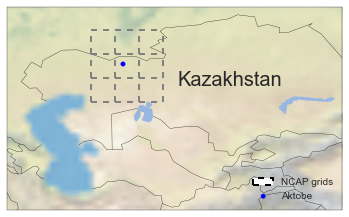

In [13]:
import matplotlib.ticker as mticker

ax = plt.axes(projection=ccrs.PlateCarree())

ax.stock_img()
ax.set_extent([45,80,35,55])
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', linestyle='--')
gl.xlocator = mticker.FixedLocator(np.arange(53.75,63.75,2.5))
gl.ylocator = mticker.FixedLocator(np.arange(46.25,56.25,2.5))

ax.scatter(57.1500, 50.2831, color='blue',transform=ccrs.PlateCarree(),label='Stations')

gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylabels_left = False

kz_legend_proxy = mpatches.Rectangle((0, 0), 1, 1, edgecolor='black', facecolor='w', ls='dashed',lw=2)
labels = ['NCAP grids','Aktobe']

plt.legend([kz_legend_proxy,station_plot], labels,\
            loc='lower right')

ax.text(63, 48, 'Kazakhstan', transform=ccrs.Geodetic(),size=20)

#plt.savefig('KZ_fig_2_illustration.png',dpi=300)

### Figure 3, heatmap

In [14]:
R2_df = pd.read_pickle('R2_df.pkl')

In [15]:
R2_df['P_NAME'] = R2_df['VAR'].apply(str) + R2_df['LEVEL'].apply(int).apply(str) + '_' + R2_df['I_PC'].apply(str)
R2_df.reset_index(inplace=True)
R2_all_table = R2_df.set_index(['MONTH','STATION_NAME','P_NAME'])['CORR_COEF'].unstack('P_NAME')

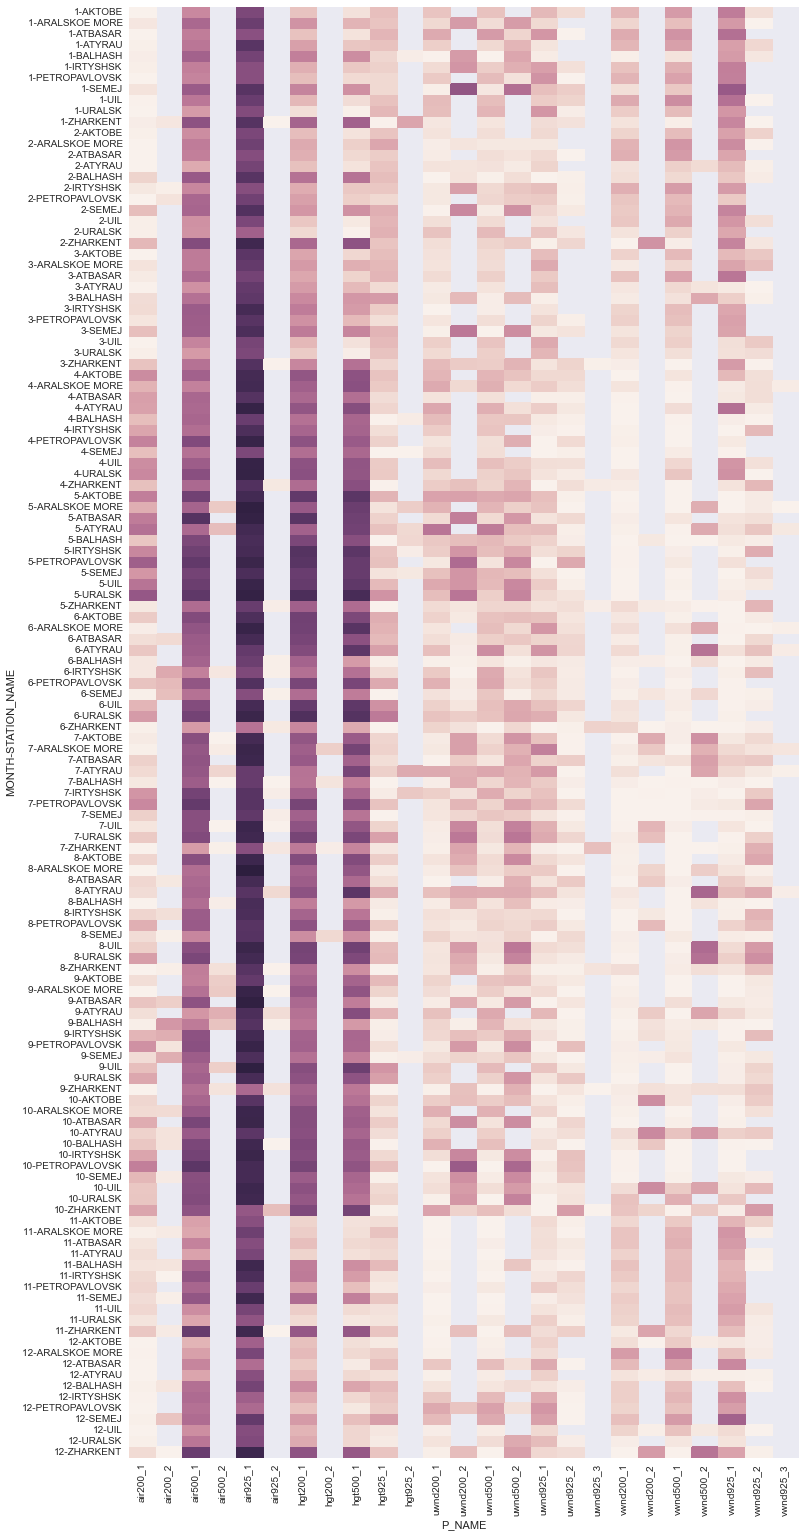

In [16]:
f, ax = plt.subplots(figsize=(12,26))

ax = sns.heatmap(R2_all_table,cbar=False)

<matplotlib.colorbar.Colorbar instance at 0x7f513f0f3950>

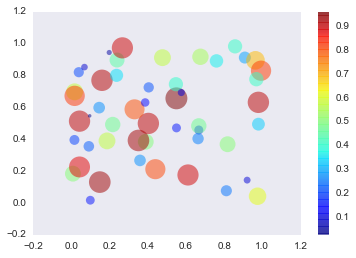